In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df=pd.read_csv("loanapproval.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

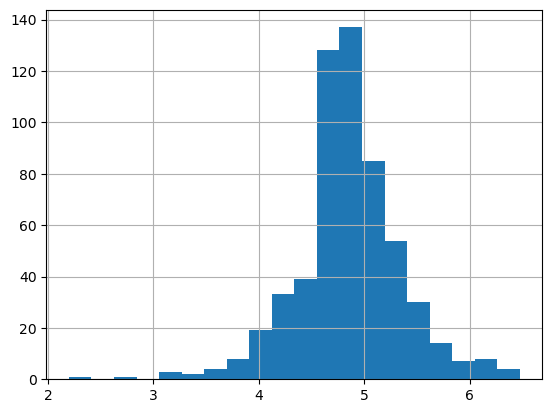

In [7]:
df['loanAmount_log']=np.log(df["LoanAmount"])
df['loanAmount_log'].hist(bins=20)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
loanAmount_log       21
dtype: int64

<Axes: >

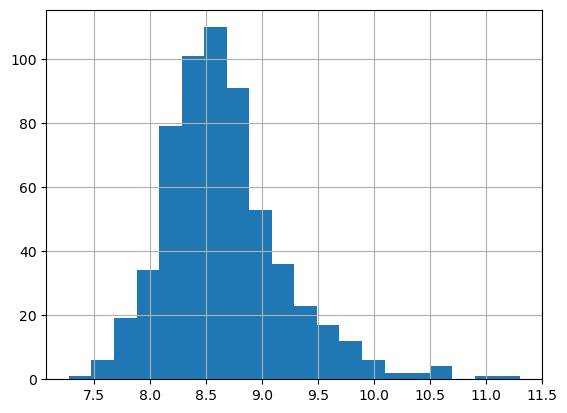

In [9]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [11]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


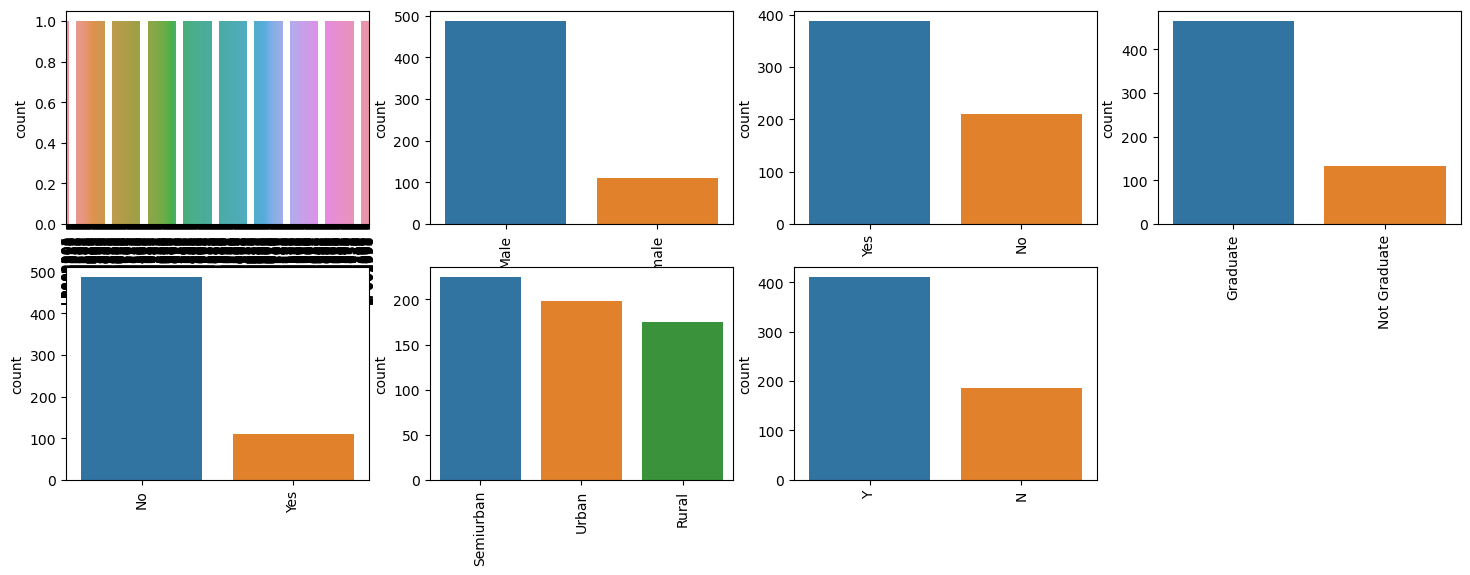

In [12]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [13]:
# Import label encoder
from sklearn import preprocessing

In [14]:

label_encoder = preprocessing.LabelEncoder()


In [18]:

obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
 df[col] = label_encoder.fit_transform(df[col])

In [20]:
obj = (df.dtypes == 'object')

In [21]:
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

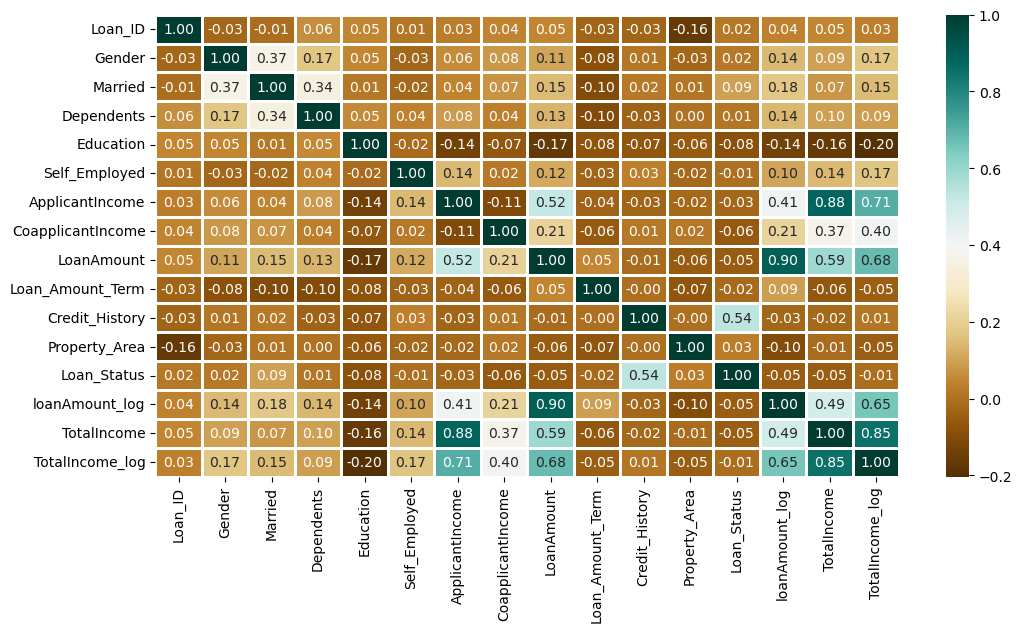

In [23]:

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
 linewidths=2,annot=True)

D:\Dhathri\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


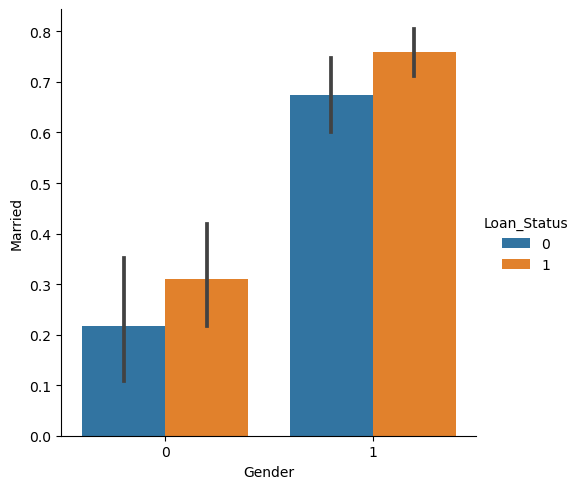

In [25]:
sns.catplot(x="Gender", y="Married",
 hue="Loan_Status",
 kind="bar",
 data=df)

In [28]:
for col in df.columns:
 df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [32]:

X.shape,Y.shape

((598, 15), (598,))

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,
 random_state=1)

In [34]:

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 15), (240, 15), (358,), (240,))

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
from sklearn import metrics

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',
 random_state =7)
svc = SVC()
lc = LogisticRegression()

In [38]:
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 97.20670391061452
Accuracy score of  KNeighborsClassifier = 75.13966480446928
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.88826815642457


D:\Dhathri\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,Y_pred))


Accuracy score of  RandomForestClassifier = 79.16666666666666
Accuracy score of  KNeighborsClassifier = 62.916666666666664
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 77.91666666666667


D:\Dhathri\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,298.500000,0.814381,0.648829,0.740803,0.222408,0.183946,5292.252508,1631.499866,144.968804,342.341137,0.856187,1.038462,0.687291,4.850145,6923.752375,8.661696
std,172.772008,0.389124,0.477736,1.003198,0.416212,0.387765,5807.265364,2953.315785,81.236564,64.494977,0.351193,0.789499,0.463985,0.493702,6220.893093,0.537856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786
25%,149.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,4.605170,4154.750000,8.332007
50%,298.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1211.500000,128.000000,360.000000,1.000000,1.000000,1.000000,4.850145,5416.500000,8.597205
75%,447.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000,2.000000,1.000000,5.096799,7452.500000,8.916305
max,597.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000,6.476972,81000.000000,11.302204


In [44]:
df['Property_Area'].value_counts()


Property_Area
1    225
2    198
0    175
Name: count, dtype: int64

<Axes: >

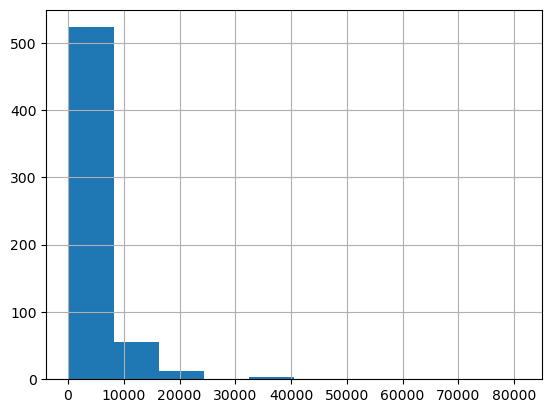

In [45]:
df['ApplicantIncome'].hist()

<Axes: >

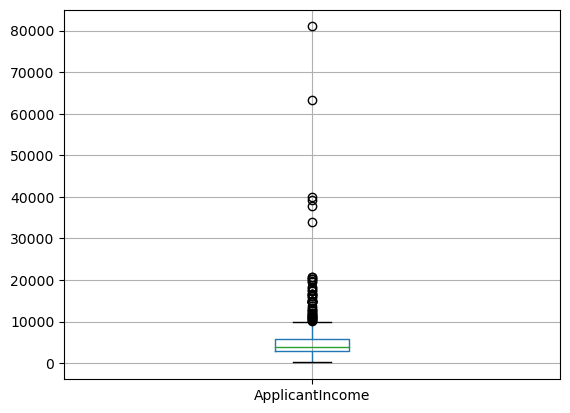

In [46]:
df.boxplot(column='ApplicantIncome')


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

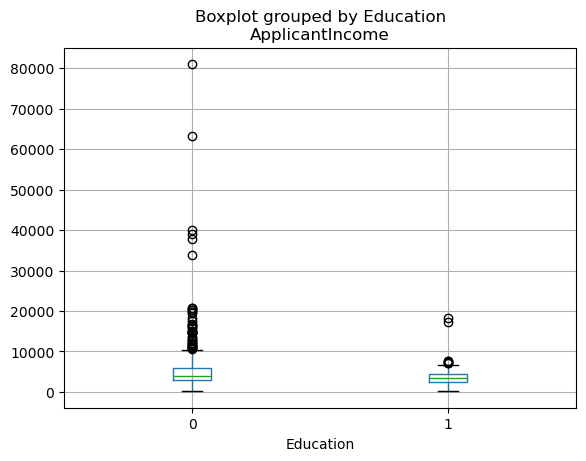

In [47]:
df.boxplot(column='ApplicantIncome', by = 'Education')


C:\Users\DELL\AppData\Local\Temp\ipykernel_14352\3239889295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome']);


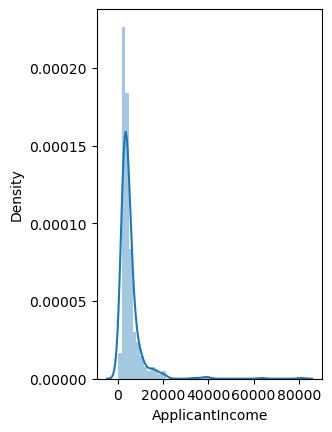

In [48]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);
plt.show()


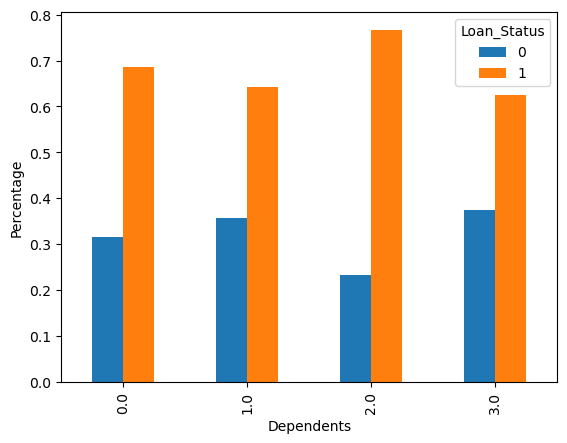

In [49]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status    0    1
Education            
0            136  329
1             51   82


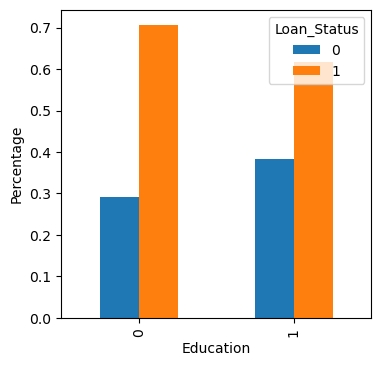

In [50]:

print(pd.crosstab(df['Education'],df['Loan_Status']))
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [54]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [55]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
Labelencoder_x = LabelEncoder()


In [56]:
for i in range(0,5):
    X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i]) 
    X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])
X_train

array([[  0.        ,   0.        ,   0.        , ...,   1.        ,
          5.4161004 , 400.        ],
       [  1.        ,   1.        ,   1.        , ...,   1.        ,
          5.85507192, 433.        ],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          5.04985601, 259.        ],
       ...,
       [  1.        ,   1.        ,   0.        , ...,   1.        ,
          5.33271879, 320.        ],
       [  1.        ,   1.        ,   0.        , ...,   1.        ,
          5.16478597, 416.        ],
       [  1.        ,   1.        ,   0.        , ...,   1.        ,
          4.8501451 , 346.        ]])

In [57]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)
y_train


array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [58]:
for i in range(0,5):
    X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])
X_test

array([[  1.        ,   1.        ,   0.        ,   1.        ,
          4.        ,   0.        ,   5.02388052,  90.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          5.        ,   0.        ,   4.96284463,  62.        ],
       [  1.        ,   0.        ,   0.        ,   0.        ,
          4.        ,   1.        ,   4.70048037,  72.        ],
       [  1.        ,   1.        ,   3.        ,   0.        ,
          3.        ,   0.        ,   5.19295685,  86.        ],
       [  1.        ,   1.        ,   0.        ,   0.        ,
          4.        ,   1.        ,   4.78749174, 116.        ],
       [  1.        ,   1.        ,   0.        ,   0.        ,
          4.        ,   1.        ,   4.93447393,  63.        ],
       [  1.        ,   1.        ,   2.        ,   0.        ,
          4.        ,   1.        ,   4.24849524,  24.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ,
          4.        ,   1.       

In [59]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)
y_test


array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)


RandomForestClassifier()

In [62]:
from sklearn import metrics
y_pred=rf_clf.predict(x_test)
print("acc of random forest clf is ",metrics.accuracy_score(y_pred,y_test))


acc of random forest clf is  0.775
